In [1]:
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
(xtrain, ytrain), (_, _) = keras.datasets.mnist.load_data()

# 10 class classifier 
y_out_a = keras.utils.to_categorical(ytrain, num_classes=10) 

# 2 class classifier, even or odd 
y_out_b = keras.utils.to_categorical((ytrain % 2 == 0).astype(int), num_classes=2) 

# regression, predict square of an input digit image
y_out_c = tf.square(tf.cast(ytrain, tf.float32))

2021-12-27 14:31:35.790511: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
input = keras.Input(shape=(28, 28, 1), name="original_img")
x = layers.Conv2D(16, 3, activation="relu")(input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
x = layers.GlobalMaxPooling2D()(x)

out_a = keras.layers.Dense(10, activation='softmax', name='10cls')(x)
out_b = keras.layers.Dense(2, activation='softmax', name='2cls')(x)
out_c = keras.layers.Dense(1, activation='linear', name='1rg')(x)

encoder = keras.Model( inputs = input, outputs = [out_a, out_b, out_c], name="encoder")

In [5]:
# Let's plot 
keras.utils.plot_model(
    encoder
)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [6]:
encoder.compile(
    loss = {
        "10cls": tf.keras.losses.CategoricalCrossentropy(),
        "2cls": tf.keras.losses.CategoricalCrossentropy(),
        "1rg": tf.keras.losses.MeanSquaredError()
    },

    metrics = {
        "10cls": 'accuracy',
        "2cls": 'accuracy',
        "1rg": 'mse'
    },

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
)

In [7]:
encoder.fit(xtrain, [y_out_a, y_out_b, y_out_c], epochs=30, verbose=2)

2021-12-27 14:33:44.335755: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/30
1875/1875 - 22s - loss: 132.6182 - 10cls_loss: 2.7340 - 2cls_loss: 1.0333 - 1rg_loss: 128.8508 - 10cls_accuracy: 0.5922 - 2cls_accuracy: 0.8201 - 1rg_mse: 128.8508
Epoch 2/30
1875/1875 - 21s - loss: 64.2100 - 10cls_loss: 0.4234 - 2cls_loss: 0.2421 - 1rg_loss: 63.5446 - 10cls_accuracy: 0.8801 - 2cls_accuracy: 0.9263 - 1rg_mse: 63.5446
Epoch 3/30
1875/1875 - 23s - loss: 51.1286 - 10cls_loss: 0.2615 - 2cls_loss: 0.1373 - 1rg_loss: 50.7299 - 10cls_accuracy: 0.9238 - 2cls_accuracy: 0.9512 - 1rg_mse: 50.7299
Epoch 4/30
1875/1875 - 22s - loss: 44.4774 - 10cls_loss: 0.2079 - 2cls_loss: 0.1124 - 1rg_loss: 44.1571 - 10cls_accuracy: 0.9384 - 2cls_accuracy: 0.9592 - 1rg_mse: 44.1571
Epoch 5/30
1875/1875 - 21s - loss: 40.0827 - 10cls_loss: 0.1845 - 2cls_loss: 0.1027 - 1rg_loss: 39.7954 - 10cls_accuracy: 0.9451 - 2cls_accuracy: 0.9632 - 1rg_mse: 39.7954
Epoch 6/30
1875/1875 - 21s - loss: 36.2314 - 10cls_loss: 0.1631 - 2cls_loss: 0.0962 - 1rg_loss: 35.9721 - 10cls_accuracy: 0.9513 - 2cls_a

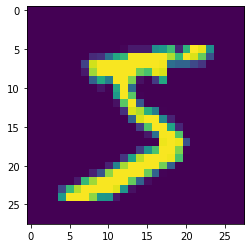

In [8]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0])

In [9]:
encoder.output

[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer '10cls')>,
 <KerasTensor: shape=(None, 2) dtype=float32 (created by layer '2cls')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer '1rg')>]

In [10]:
pred10, pred2, pred1 = encoder.predict(tf.expand_dims(xtrain[0], 0))

In [11]:
pred1 

array([[24.344992]], dtype=float32)

In [12]:
pred2.argmax()

0

In [13]:
pred10.argmax()

5

In [14]:
(xtrain, ytrain), (xtest, _) = keras.datasets.mnist.load_data()

xtrain = xtrain[:10000] # both input sample should be same number 
ytrain = ytrain[:10000] # both input sample should be same number

y_out_a = keras.utils.to_categorical(ytrain, num_classes=10)
y_out_b = keras.utils.to_categorical((ytrain % 2 == 0).astype(int), num_classes=2)
y_out_c = tf.square(tf.cast(ytrain, tf.float32))

print(xtrain.shape, xtest.shape) 
print(y_out_a.shape, y_out_b.shape, y_out_c.shape)
# (10000, 28, 28) (10000, 28, 28)
# (10000, 10) (10000, 2) (10000,)

(10000, 28, 28) (10000, 28, 28)
(10000, 10) (10000, 2) (10000,)


In [15]:
input0 = keras.Input(shape=(28, 28, 1), name="img2")
input1 = keras.Input(shape=(28, 28, 1), name="img1")
concate_input = layers.Concatenate()([input0, input1])

x = layers.Conv2D(16, 3, activation="relu")(concate_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
x = layers.GlobalMaxPooling2D()(x)

out_a = keras.layers.Dense(10, activation='softmax', name='10cls')(x)
out_b = keras.layers.Dense(2, activation='softmax', name='2cls')(x)
out_c = keras.layers.Dense(1, activation='linear', name='1rg')(x)

In [16]:
# multi-input , multi-output
encoder = keras.Model( inputs = [input0, input1], 
                       outputs = [out_a, out_b, out_c], name="encoder")

In [18]:
encoder.compile(
    loss = {
        "10cls": tf.keras.losses.CategoricalCrossentropy(),
        "2cls": tf.keras.losses.CategoricalCrossentropy(),
        "1rg": tf.keras.losses.MeanSquaredError()
    },

    metrics = {
        "10cls": 'accuracy',
        "2cls": 'accuracy',
        "1rg": 'mse'
    },

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
)

In [19]:
# multi-input, multi-output
encoder.fit([xtrain, xtest], [y_out_a, y_out_b, y_out_c], 
             epochs=30, batch_size = 256, verbose=2)

Epoch 1/30
40/40 - 3s - loss: 618.9952 - 10cls_loss: 27.7201 - 2cls_loss: 14.3539 - 1rg_loss: 576.9213 - 10cls_accuracy: 0.1144 - 2cls_accuracy: 0.5053 - 1rg_mse: 576.9213
Epoch 2/30
40/40 - 3s - loss: 315.7523 - 10cls_loss: 24.3919 - 2cls_loss: 6.0730 - 1rg_loss: 285.2874 - 10cls_accuracy: 0.1634 - 2cls_accuracy: 0.5890 - 1rg_mse: 285.2874
Epoch 3/30
40/40 - 3s - loss: 221.8605 - 10cls_loss: 15.8143 - 2cls_loss: 4.6098 - 1rg_loss: 201.4364 - 10cls_accuracy: 0.1692 - 2cls_accuracy: 0.6487 - 1rg_mse: 201.4364
Epoch 4/30
40/40 - 3s - loss: 177.9383 - 10cls_loss: 10.4659 - 2cls_loss: 4.2535 - 1rg_loss: 163.2189 - 10cls_accuracy: 0.2180 - 2cls_accuracy: 0.6674 - 1rg_mse: 163.2189
Epoch 5/30
40/40 - 3s - loss: 159.5819 - 10cls_loss: 7.1036 - 2cls_loss: 3.8686 - 1rg_loss: 148.6098 - 10cls_accuracy: 0.2661 - 2cls_accuracy: 0.6803 - 1rg_mse: 148.6098
Epoch 6/30
40/40 - 3s - loss: 136.1491 - 10cls_loss: 5.4425 - 2cls_loss: 3.5096 - 1rg_loss: 127.1970 - 10cls_accuracy: 0.3636 - 2cls_accuracy: 0.

In [20]:
pred10, pred2, pred1 = encoder.predict(
    [
         tf.expand_dims(xtrain[0], 0),
         tf.expand_dims(xtrain[0], 0)
    ]
)

In [21]:
# regression part 
pred1

array([[13.920458]], dtype=float32)

In [22]:
# even or odd 
pred2.argmax()

0

In [23]:
# what digit 
pred10.argmax()

5